In [2]:
%matplotlib notebook
import os
import pandas as pd
import numpy as np
from numpy.random import randint
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import time
from PIL import Image

import torch
from torch import nn
from torch.nn import functional as F
import torch.utils.data as td
import torchvision as tv
from sklearn.metrics import confusion_matrix

In [2]:
import cv2
import random

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
print(torch.__version__)

cuda
1.0.1.post2


In [5]:
from glob import glob
from PIL import Image

In [6]:
data_dir = 'train.csv'

In [7]:
train_data_label = pd.read_csv(data_dir)

In [8]:
train_data_label

,Image,Id
0,00022e1a.jpg,w_e15442c
1,000466c4.jpg,w_1287fbc
2,00087b01.jpg,w_da2efe0
3,001296d5.jpg,w_19e5482
4,0014cfdf.jpg,w_f22f3e3
5,0025e8c2.jpg,w_8b1ca89
6,0026a8ab.jpg,w_eaad6a8
7,0031c258.jpg,new_whale
8,0035632e.jpg,w_3d0bc7a
9,0037e7d3.jpg,w_50db782


In [9]:
data_train, data_val = train_test_split(train_data_label,test_size=0.2, random_state=42)

In [10]:
data_train

,Image,Id
4275,70238365.jpg,w_ebf3f26
4533,75e189d4.jpg,w_715c557
1745,2e08f2ba.jpg,w_b48535f
5427,8cea266f.jpg,w_8e92baa
1452,26482485.jpg,w_b3655a6
101,0267139c.jpg,w_e156c87
319,07a58418.jpg,w_4e7fc3e
9218,f0411154.jpg,w_326e389
2742,47575ccc.jpg,w_afe953f
625,0fc63e94.jpg,w_9771603


In [11]:
data_val

,Image,Id
8920,e871b226.jpg,w_38158d6
9839,ffbca206.jpg,w_73b26b7
1851,3054d682.jpg,w_0acce53
6334,a49b519c.jpg,w_7dee51b
8516,dd5bcda3.jpg,w_813c5be
416,0a254aa7.jpg,w_9b401eb
8830,e5d8bc42.jpg,w_f93d780
6369,a584067a.jpg,w_66c1b54
7194,bad83ce8.jpg,w_853c1f7
8444,db9e8d8f.jpg,w_44f0fa2


In [12]:
classes = train_data_label.Id.unique()

In [13]:
len(classes)

4251

In [14]:
classes_Id_map = {}

In [15]:
for i in range(len(classes)):
    classes_Id_map[i] = classes[i]

In [16]:
classes_Id_map[3]

'w_19e5482'

In [17]:
Id_classes_map = {}

In [18]:
for i in range(len(classes)):
    Id_classes_map[classes[i]] = i

In [19]:
series = train_data_label['Id']

label_series = train_data_label['Id'].value_counts()

In [20]:
Id_classes_map

{'w_e15442c': 0,
 'w_1287fbc': 1,
 'w_da2efe0': 2,
 'w_19e5482': 3,
 'w_f22f3e3': 4,
 'w_8b1ca89': 5,
 'w_eaad6a8': 6,
 'new_whale': 7,
 'w_3d0bc7a': 8,
 'w_50db782': 9,
 'w_2863d51': 10,
 'w_6dc7db6': 11,
 'w_968f2ca': 12,
 'w_fd1cb9d': 13,
 'w_60759c2': 14,
 'w_ab6bb0a': 15,
 'w_79b42cd': 16,
 'w_c9ba30c': 17,
 'w_e6ec8ee': 18,
 'w_7e5cc5e': 19,
 'w_ab6db0f': 20,
 'w_bc8d634': 21,
 'w_b59c523': 22,
 'w_2850471': 23,
 'w_51969d2': 24,
 'w_4be8a3e': 25,
 'w_c0cfd5b': 26,
 'w_339c8ae': 27,
 'w_7c7a78c': 28,
 'w_25871da': 29,
 'w_97f5054': 30,
 'w_6926f08': 31,
 'w_9c70a11': 32,
 'w_8e4abc9': 33,
 'w_222dcb7': 34,
 'w_36a4e8b': 35,
 'w_886257d': 36,
 'w_a2eb1bb': 37,
 'w_2ac8b4d': 38,
 'w_9ea2cc3': 39,
 'w_af67683': 40,
 'w_7b3f9d1': 41,
 'w_effd0ea': 42,
 'w_96b697f': 43,
 'w_c07f119': 44,
 'w_685466f': 45,
 'w_04c1951': 46,
 'w_307065e': 47,
 'w_b4369cc': 48,
 'w_2173953': 49,
 'w_27cf4e2': 50,
 'w_aed023d': 51,
 'w_af8cad1': 52,
 'w_a837660': 53,
 'w_4e68ddc': 54,
 'w_f19faeb': 55,
 '

In [21]:
label_series

new_whale    810
w_1287fbc     34
w_98baff9     27
w_7554f44     26
w_1eafe46     23
w_ab4cae2     22
w_693c9ee     22
w_fd1cb9d     22
w_987a36f     21
w_73d5489     21
w_43be268     21
w_f19faeb     20
w_95874a5     19
w_9b401eb     19
w_b7d5069     18
w_c0d494d     18
w_0e737d0     17
w_eb0a6ed     17
w_18eee6e     17
w_dbda0d6     17
w_67de30b     16
w_b0e05b1     16
w_6c803bf     16
w_a59905f     16
w_17ee910     16
w_9ca943b     15
w_ee17a08     15
w_89e159a     15
w_cae7677     15
w_8c1ec28     14
            ... 
w_8bcf29b      1
w_6460698      1
w_4225bb3      1
w_c07f119      1
w_ca5abbb      1
w_8c408dc      1
w_5f6fb4e      1
w_34a0eab      1
w_34c8690      1
w_945aefe      1
w_68a7146      1
w_f7fed13      1
w_fb270f3      1
w_a9f41fd      1
w_b820615      1
w_c666071      1
w_01a99a5      1
w_f801078      1
w_00d8453      1
w_008c602      1
w_5d2734c      1
w_b1a4f29      1
w_8963cff      1
w_29c286a      1
w_ce269ec      1
w_397cb24      1
w_23b01a6      1
w_3050553     

In [22]:
type(label_series)

pandas.core.series.Series

In [23]:
data_dir = "train"

## 1 Open Image in RGB Mode

In [26]:
class WhaleDataset(td.Dataset):
    def __init__(self, data_dir, label_csv, total_csv,mode,image_size=(224, 224)):
        super(WhaleDataset, self).__init__()
        self.image_size = image_size
        self.mode = mode
        self.data = label_csv
        self.images_dir = data_dir
        self.total_data = total_csv
    def __len__(self):
        return len(self.data)
    def __repr__(self):
        return "BirdsDataset(mode={}, image_size={})". \
            format(self.mode, self.image_size)
    def __getitem__(self, idx):
        img_path = os.path.join(self.images_dir, self.data.iloc[idx]['Image'])
        
        img = Image.open(img_path).convert('RGB')
        #stack_img = np.stack((img,)*3, axis=-1)
        #img = Image.fromarray(stack_img, 'RGB')
       
    
        transform = tv.transforms.Compose([tv.transforms.Resize(self.image_size),
                                           tv.transforms.ToTensor(),
                                           tv.transforms.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5])
                                        # COMPLETE
                                        ])
        x = transform(img)
        d = Id_classes_map[self.data.iloc[idx]['Id']]
        return x, d
    
    def number_of_classes(self):
        return self.total_data['Id'].nunique()

In [30]:
def myimshow(image, ax=plt):
    image = image.to('cpu').numpy()
    image = np.moveaxis(image, [0, 1, 2], [2, 0, 1])
    image = (image + 1) / 2
    image[image < 0] = 0
    image[image > 1] = 1
    h = ax.imshow(image)
    ax.axis('off')
    
    return h

In [31]:
train_set = WhaleDataset(data_dir = data_dir,
                         label_csv = data_train, 
                         total_csv = train_data_label,
                         mode = 'train')
print(data_dir)

train


In [33]:
x = train_set.__getitem__(7)

In [34]:
x

(tensor([[[-0.5843, -0.5765, -0.5294,  ..., -0.4039, -0.4510, -0.4510],
          [-0.6078, -0.6078, -0.6000,  ..., -0.4275, -0.4510, -0.4510],
          [-0.6314, -0.6314, -0.6235,  ..., -0.4588, -0.4510, -0.4510],
          ...,
          [-0.4353, -0.4275, -0.4510,  ..., -0.5529, -0.5451, -0.5529],
          [-0.4039, -0.4039, -0.4196,  ..., -0.6000, -0.5765, -0.5843],
          [-0.3804, -0.3804, -0.4353,  ..., -0.6000, -0.5608, -0.5765]],
 
         [[-0.1922, -0.1843, -0.1373,  ..., -0.0196, -0.0667, -0.0667],
          [-0.2157, -0.2157, -0.2078,  ..., -0.0431, -0.0667, -0.0667],
          [-0.2392, -0.2392, -0.2314,  ..., -0.0745, -0.0667, -0.0667],
          ...,
          [-0.0431, -0.0353, -0.0588,  ..., -0.0902, -0.0824, -0.0902],
          [-0.0118, -0.0118, -0.0275,  ..., -0.1373, -0.1137, -0.1216],
          [ 0.0118,  0.0118, -0.0431,  ..., -0.1765, -0.1451, -0.1451]],
 
         [[ 0.2706,  0.2784,  0.3255,  ...,  0.5373,  0.4745,  0.4745],
          [ 0.2471,  0.2471,

<IPython.core.display.Javascript object>


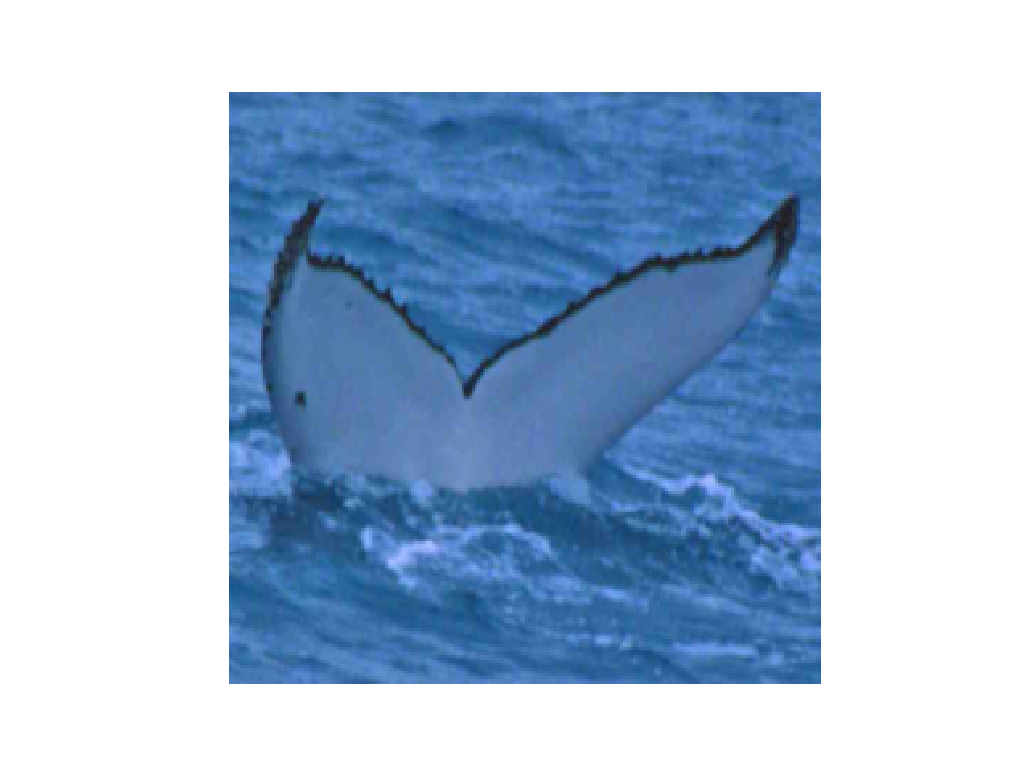

In [35]:
myimshow(x[0])

In [36]:
x[1]

3480

In [37]:
len(data_val)

1970

In [38]:
len(data_train)

7880

In [39]:
train_loader = td.DataLoader(train_set, batch_size=16, shuffle=True, pin_memory=True)

In [40]:
val_set = WhaleDataset(data_dir = data_dir,
                       label_csv=data_val,
                       total_csv = train_data_label,
                       mode = 'val')

In [41]:
val_loader = td.DataLoader(val_set, batch_size=16, pin_memory=True)

<IPython.core.display.Javascript object>


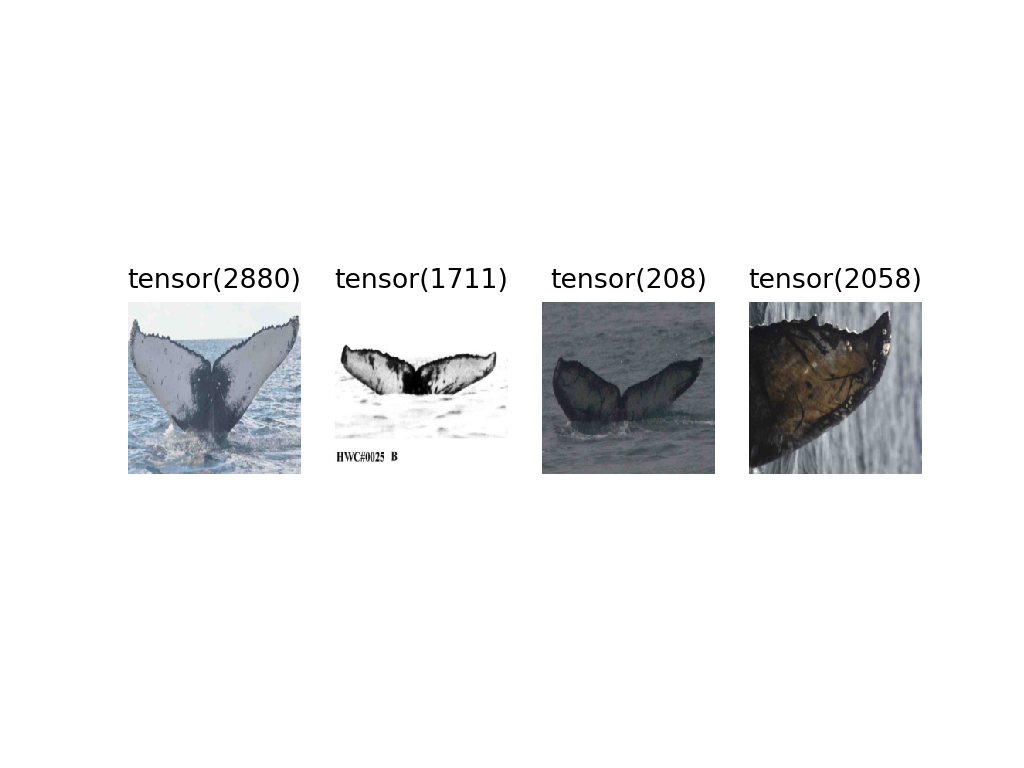

In [42]:
num_loop = 0
fig = plt.figure()
for img, label in train_loader:
    num_loop += 1
    if (num_loop <= 4):
        plt.subplot(1, 4, num_loop)
        myimshow(img[0])
        plt.title(str(label[0]))
    else:
        break
        
        
            

In [43]:
import nntools as nt

In [45]:
class NNClassifier(nt.NeuralNetwork):
    def __init__(self):
        super(NNClassifier, self).__init__()
        self.cross_entropy = nn.CrossEntropyLoss()
    def criterion(self, y, d):
        return self.cross_entropy(y, d)

## 2 Training VGG16 Model  

In [47]:
vgg = tv.models.vgg16_bn(pretrained=True)

In [48]:
vgg.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace)
  (2): Dropout(p=0.5)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace)
  (5): Dropout(p=0.5)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [49]:
class VGG16Transfer(NNClassifier):
    def __init__(self, num_classes, fine_tuning=False):
        super(VGG16Transfer, self).__init__()
        vgg = tv.models.vgg16_bn(pretrained=True)
        for param in vgg.parameters():
            param.requires_grad = fine_tuning
        self.features = vgg.features
        self.classifier = vgg.classifier
        # COMPLETE
        num_ftrs = vgg.classifier[6].in_features
        self.classifier[6] = nn.Linear(num_ftrs, num_classes)
    def forward(self, x):
        # COMPLETE
        f = self.features(x)
        f = f.view(-1, 25088)
        y = self.classifier(f)
        return y

In [50]:
num_classes = train_set.number_of_classes()

In [51]:
vgg16 = VGG16Transfer(num_classes)

In [52]:
vgg16

VGG16Transfer(
  (cross_entropy): CrossEntropyLoss()
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=Fals

In [56]:
class ClassificationStatsManager(nt.StatsManager):

    def __init__(self):
        super(ClassificationStatsManager, self).__init__()
    def init(self):
        super(ClassificationStatsManager, self).init()
        self.running_accuracy = 0
    def accumulate(self, loss, x, y, d):
        super(ClassificationStatsManager, self).accumulate(loss, x, y, d)
        topK_rpob, l = torch.topk(y, 5)
        batchSize = d.size()[0]
        count = 0
        for i in range(batchSize):
            if(d[i] in l[i]):
                count += 1
        
        self.running_accuracy += count / batchSize
        
    def summarize(self):
        loss = super(ClassificationStatsManager, self).summarize()
        accuracy = 100 * self.running_accuracy / self.number_update# COMPLETE
        return {'loss': loss, 'accuracy': accuracy}

In [57]:
lr = 1e-3
net = VGG16Transfer(num_classes)
net = net.to(device)
adam = torch.optim.Adam(net.parameters(), lr=lr)
stats_manager = ClassificationStatsManager()
exp1 = nt.Experiment(net, train_set, val_set, adam, stats_manager,
                output_dir="whaleclass1_new1", perform_validation_during_training=True)

In [58]:
def plot(exp, fig, axes):
    axes[0].clear()
    axes[1].clear()
    axes[0].plot([exp.history[k][0]['loss'] for k in range(exp.epoch)],
                label="training loss")
    axes[0].plot([exp.history[k][1]['loss'] for k in range(exp.epoch)], label="evaluation loss")
    axes[0].legend(('Validation','Training'), fontsize=6, loc=0)
    axes[0].title.set_text('Model Loss')
    
    axes[1].plot([exp.history[k][0]['accuracy'] for k in range(exp.epoch)],
                label="training accuracy")
    axes[1].plot([exp.history[k][1]['accuracy'] for k in range(exp.epoch)], label="evaluation accuracy")
    # COMPLETE
    axes[1].legend(('Validation','Training'), fontsize=6, loc=2)
    axes[1].title.set_text('Model Accuracy')
    
    plt.tight_layout()
    fig.canvas.draw()

<IPython.core.display.Javascript object>


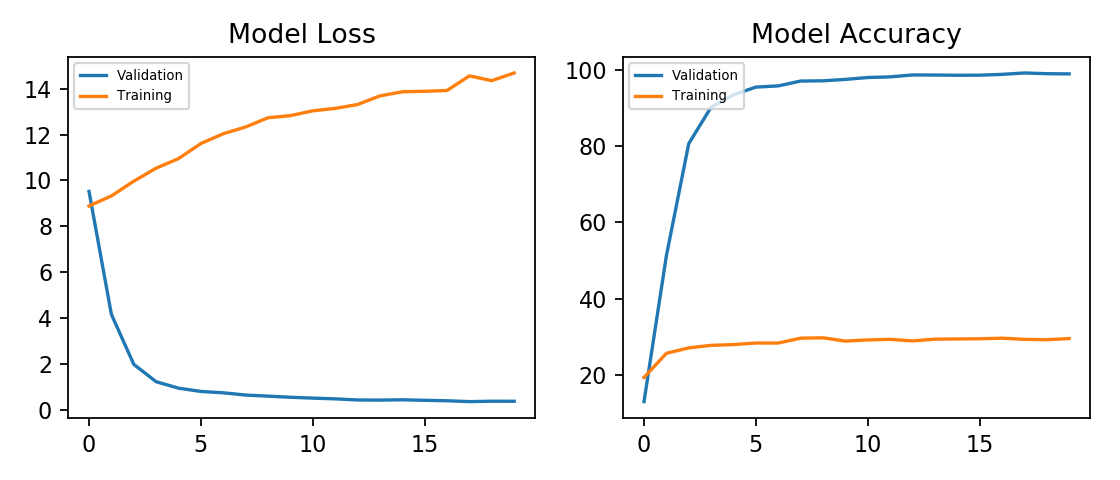

Start/Continue training from epoch 20
Finish training for 20 epochs


In [59]:

fig, axes = plt.subplots(ncols=2, figsize=(7, 3))
exp1.run(num_epochs=20, plot=lambda exp: plot(exp, fig=fig, axes=axes))

In [60]:
net.eval()

VGG16Transfer(
  (cross_entropy): CrossEntropyLoss()
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=Fals

In [61]:
print(exp1.evaluate())

{'loss': 14.685720079313448, 'accuracy': 29.522357723577237}


 VGG16 Accuracy is 29.52% (Open image in RGB Mode, without doing Data Augmentation)

## 3 Training ResNet Model

In [70]:
class ClassificationStatsManager(nt.StatsManager):

    def __init__(self):
        super(ClassificationStatsManager, self).__init__()
    def init(self):
        super(ClassificationStatsManager, self).init()
        self.running_accuracy = 0
    def accumulate(self, loss, x, y, d):
        super(ClassificationStatsManager, self).accumulate(loss, x, y, d)
        topK_rpob, l = torch.topk(y, 5)
        batchSize = d.size()[0]
        count = 0
        for i in range(batchSize):
            if(d[i] in l[i]):
                count += 1
        
        self.running_accuracy += count / batchSize
        
    def summarize(self):
        loss = super(ClassificationStatsManager, self).summarize()
        accuracy = 100 * self.running_accuracy / self.number_update# COMPLETE
        return {'loss': loss, 'accuracy': accuracy}

In [71]:
class Resnet18Transfer (NNClassifier):
    def __init__(self, num_classes, fine_tuning=False):
        super(Resnet18Transfer, self).__init__()
        resnet = tv.models.resnet18(pretrained=True)
        for param in resnet.parameters():
            param.requires_grad = fine_tuning
        
        self.model = resnet
        num_ftrs = resnet.fc.in_features
        self.model.fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        y = self.model(x)
        return y

<IPython.core.display.Javascript object>


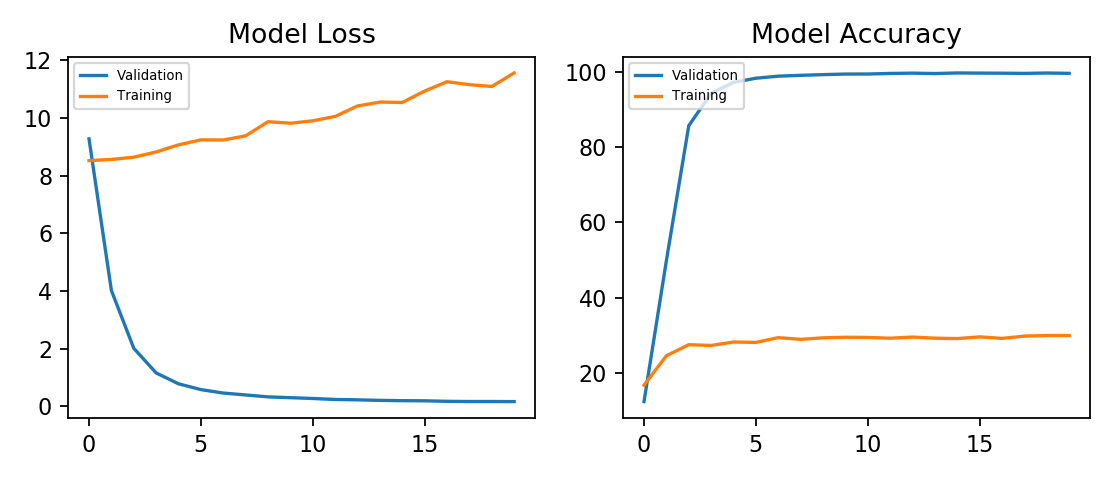

Start/Continue training from epoch 0
Epoch 1 (Time: 191.71s)
Epoch 2 (Time: 199.38s)
Epoch 3 (Time: 187.57s)
Epoch 4 (Time: 191.23s)
Epoch 5 (Time: 207.38s)
Epoch 6 (Time: 199.83s)
Epoch 7 (Time: 195.57s)
Epoch 8 (Time: 192.79s)
Epoch 9 (Time: 202.32s)
Epoch 10 (Time: 205.47s)
Epoch 11 (Time: 208.89s)
Epoch 12 (Time: 206.53s)
Epoch 13 (Time: 200.80s)
Epoch 14 (Time: 183.06s)
Epoch 15 (Time: 189.10s)
Epoch 16 (Time: 195.62s)
Epoch 17 (Time: 194.72s)
Epoch 18 (Time: 195.62s)
Epoch 19 (Time: 192.97s)
Epoch 20 (Time: 200.95s)
Finish training for 20 epochs


In [73]:
fig2, axes2 = plt.subplots(ncols=2, figsize=(7, 3))

lr = 1e-3
net = Resnet18Transfer(num_classes)
net = net.to(device)
adam = torch.optim.Adam(net.parameters(), lr=lr)
stats_manager = ClassificationStatsManager()
exp2 = nt.Experiment(net, train_set, val_set, adam, stats_manager,output_dir="whaleclass2_new_final", perform_validation_during_training=True)
exp2.run(num_epochs=20, plot=lambda exp: plot(exp, fig=fig2, axes=axes2))


In [74]:
net = Resnet18Transfer(train_set.number_of_classes()).to(device)

In [75]:
print(exp2.evaluate())

{'loss': 11.561711218298935, 'accuracy': 29.878048780487806}


## 4 Data Augmentation Approach For Optimization and Using VGG16 Model 

In [76]:
label_series = label_series.to_dict()

In [77]:
label_series

{'new_whale': 810,
 'w_1287fbc': 34,
 'w_98baff9': 27,
 'w_7554f44': 26,
 'w_1eafe46': 23,
 'w_ab4cae2': 22,
 'w_693c9ee': 22,
 'w_fd1cb9d': 22,
 'w_987a36f': 21,
 'w_73d5489': 21,
 'w_43be268': 21,
 'w_f19faeb': 20,
 'w_95874a5': 19,
 'w_9b401eb': 19,
 'w_b7d5069': 18,
 'w_c0d494d': 18,
 'w_0e737d0': 17,
 'w_eb0a6ed': 17,
 'w_18eee6e': 17,
 'w_dbda0d6': 17,
 'w_67de30b': 16,
 'w_b0e05b1': 16,
 'w_6c803bf': 16,
 'w_a59905f': 16,
 'w_17ee910': 16,
 'w_9ca943b': 15,
 'w_ee17a08': 15,
 'w_89e159a': 15,
 'w_cae7677': 15,
 'w_8c1ec28': 14,
 'w_540fd73': 14,
 'w_7e8b270': 14,
 'w_b074cdf': 14,
 'w_2d99a0c': 14,
 'w_6202983': 13,
 'w_fe49bc4': 13,
 'w_44cccf6': 13,
 'w_bb2d34d': 13,
 'w_f8e6546': 13,
 'w_9ea2cc3': 13,
 'w_4e52a49': 13,
 'w_4b7b80b': 13,
 'w_fba3bde': 13,
 'w_7c7a78c': 12,
 'w_49bbc79': 12,
 'w_b9e00eb': 12,
 'w_7b035cc': 12,
 'w_b678944': 12,
 'w_c9e1cdc': 12,
 'w_2071a4c': 12,
 'w_8c1e2e4': 11,
 'w_b942708': 11,
 'w_da2efe0': 11,
 'w_7311fe4': 11,
 'w_3d66298': 11,
 'w_a254e

In [78]:
class AugmentData(td.Dataset):
    def __init__(self, data_dir, label_csv, total_csv,mode,image_size=(224, 224)):
        super(AugmentData, self).__init__()
        self.image_size = image_size
        self.mode = mode
        self.data = label_csv
        self.images_dir = data_dir
        self.total_data = total_csv
    def __len__(self):
        return len(self.data)
    def __repr__(self):
        return "BirdsDataset(mode={}, image_size={})". \
            format(self.mode, self.image_size)
    def __getitem__(self, idx):
        img_path = os.path.join(self.images_dir, self.data.iloc[idx]['Image'])
#         print(self.images_dir)
#         print(img_path)
        img = Image.open(img_path).convert('RGB')
        transform_list = []
      
        # data augmentation on the minority class
        transform_list = self.augment_transform(transform_list, idx)
        
        
        transform_list.append(tv.transforms.Resize(self.image_size))
        transform_list.append(tv.transforms.ToTensor())
        transform_list.append(
            tv.transforms.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5]))
        
        transform = tv.transforms.Compose(transform_list)
        x = transform(img)
        # 1/10 gaussian noise added 
        if random.random() < 0.5 :
            x = x + torch.randn_like(x)/10
        d = Id_classes_map[self.data.iloc[idx]['Id']]
        return x, d
    
    def number_of_classes(self):
        return self.total_data['Id'].nunique()
    
    def augment_transform(self, transform_list, idx):
        rand_num = random.randint(0,3)
        if rand_num == 0:
            transform_list.append(tv.transforms.ColorJitter(brightness = 0.125))
        elif rand_num == 1:
            transform_list.append(tv.transforms.ColorJitter(contrast = 0.3))
        elif rand_num == 2:
            transform_list.append(tv.transforms.ColorJitter(saturation = 0.3))
        else:
            transform_list.append(tv.transforms.ColorJitter(hue = 0.3))
        
        
        if random.random() < 0.5 :
            transform_list.append(tv.transforms.RandomHorizontalFlip())
        if random.random() < 0.5 :
            transform_list.append(tv.transforms.RandomRotation(25))
        if random.random() < 0.5 :
            transform_list.append(tv.transforms.RandomAffine(degrees = 0, 
                                                            translate = (0.1,0.15),
                                                            scale = None,
                                                            shear = None))
        return transform_list
   

In [79]:
# calculate the weighted sample
classes_sample_count = [0 for i in range(len(classes))]
for key in label_series:
    classes_sample_count[Id_classes_map[key]] = label_series[key]

In [80]:
data_train

,Image,Id
4275,70238365.jpg,w_ebf3f26
4533,75e189d4.jpg,w_715c557
1745,2e08f2ba.jpg,w_b48535f
5427,8cea266f.jpg,w_8e92baa
1452,26482485.jpg,w_b3655a6
101,0267139c.jpg,w_e156c87
319,07a58418.jpg,w_4e7fc3e
9218,f0411154.jpg,w_326e389
2742,47575ccc.jpg,w_afe953f
625,0fc63e94.jpg,w_9771603


In [81]:
train_target = [0 for _ in range(len(data_train['Id']))]

In [82]:
for i in range(len(data_train['Id'])):
    train_target[i] = Id_classes_map[data_train.iloc[i]['Id']]

In [83]:
train_target

[1955,
 1876,
 1287,
 3003,
 1089,
 92,
 277,
 3480,
 1725,
 521,
 7,
 7,
 7,
 7,
 165,
 934,
 1687,
 254,
 1776,
 7,
 219,
 2136,
 288,
 320,
 569,
 2363,
 869,
 2545,
 4033,
 7,
 1580,
 83,
 7,
 574,
 1099,
 8,
 837,
 90,
 311,
 120,
 463,
 1104,
 3501,
 2287,
 2651,
 7,
 3371,
 27,
 778,
 2523,
 1037,
 55,
 605,
 2662,
 7,
 1224,
 491,
 7,
 13,
 2256,
 1716,
 1204,
 2221,
 3896,
 7,
 1938,
 618,
 1832,
 979,
 86,
 3434,
 3565,
 1928,
 2770,
 4146,
 1368,
 2552,
 775,
 134,
 521,
 2293,
 1036,
 116,
 2137,
 7,
 7,
 7,
 3574,
 2745,
 504,
 1590,
 235,
 2046,
 655,
 3499,
 828,
 1164,
 2236,
 826,
 159,
 1254,
 7,
 3529,
 2909,
 516,
 77,
 1202,
 1190,
 1202,
 1202,
 3126,
 2383,
 1615,
 588,
 94,
 958,
 704,
 364,
 7,
 2795,
 4213,
 427,
 800,
 210,
 2994,
 1473,
 2688,
 2587,
 1331,
 7,
 2100,
 3005,
 2030,
 3483,
 1011,
 1193,
 1012,
 7,
 3353,
 1700,
 541,
 759,
 4166,
 4114,
 2134,
 1165,
 143,
 866,
 2248,
 1677,
 2112,
 675,
 720,
 40,
 1796,
 449,
 2727,
 2767,
 2232,
 7,
 589,

In [84]:
classes_Id_map[train_target[0]]

'w_ebf3f26'

### random weighted sampler :https://discuss.pytorch.org/t/some-problems-with-weightedrandomsampler/23242

In [85]:
weights = 1. / torch.tensor(classes_sample_count, dtype=torch.float)
samples_weights = weights[train_target]
print(samples_weights)
sampler = td.sampler.WeightedRandomSampler(weights = samples_weights,
                                          num_samples = len(samples_weights),
                                          replacement = True)

tensor([0.3333, 0.5000, 0.5000,  ..., 0.0909, 1.0000, 0.1250])


/opt/conda/lib/python3.6/site-packages/torch/utils/data/sampler.py:115: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.weights = torch.tensor(weights, dtype=torch.double)


In [86]:
train_set = AugmentData(data_dir = data_dir,
                         label_csv = data_train, 
                         total_csv = train_data_label,
                         mode = 'train')

In [87]:
train_loader = td.DataLoader(train_set, batch_size=16, sampler=sampler,pin_memory=True)


In [125]:
lr = 1e-3
net = VGG16Transfer(num_classes)
net = net.to(device)
adam = torch.optim.Adam(net.parameters(), lr=lr)
stats_manager = ClassificationStatsManager()
exp3 = nt.Experiment(net, train_set, val_set, adam, stats_manager,
                output_dir="whaleclass_augmented", perform_validation_during_training=True)

<IPython.core.display.Javascript object>


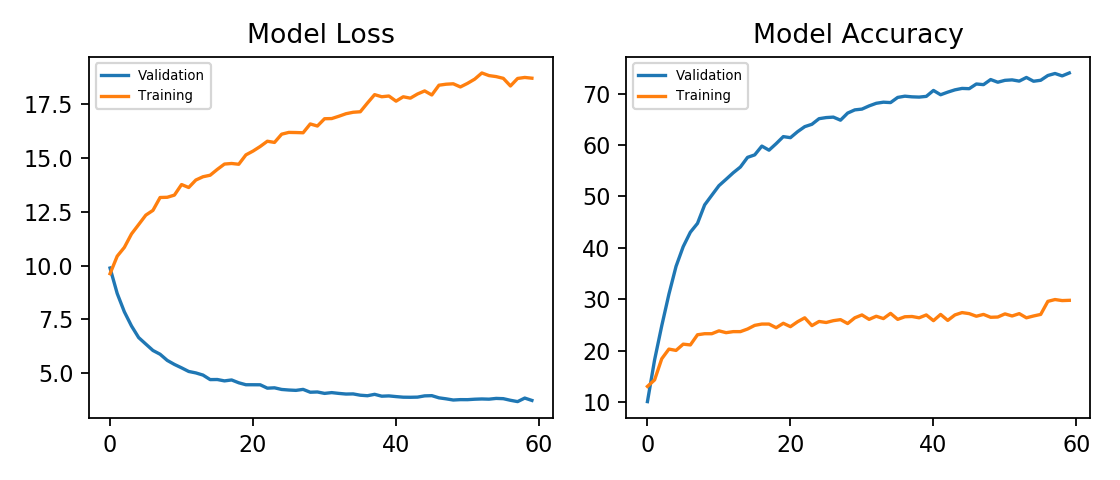

Start/Continue training from epoch 60
Finish training for 60 epochs


In [133]:
fig, axes = plt.subplots(ncols=2, figsize=(7, 3))
exp3.run(num_epochs=60, plot=lambda exp: plot(exp, fig=fig, axes=axes))

In [102]:
print(exp3.evaluate())

{'loss': 18.697418468754467, 'accuracy': 29.776422764227643}


##  5 Grayscale Image Approach and Using VGG16 Model

In [127]:
class WhaleDataset(td.Dataset):
    def __init__(self, data_dir, label_csv, total_csv,mode,image_size=(224, 224)):
        super(WhaleDataset, self).__init__()
        self.image_size = image_size
        self.mode = mode
        self.data = label_csv
        self.images_dir = data_dir
        self.total_data = total_csv
    def __len__(self):
        return len(self.data)
    def __repr__(self):
        return "BirdsDataset(mode={}, image_size={})". \
            format(self.mode, self.image_size)
    def __getitem__(self, idx):
        img_path = os.path.join(self.images_dir, self.data.iloc[idx]['Image'])
        
        img = Image.open(img_path).convert('L')
        stack_img = np.stack((img,)*3, axis=-1)
        img = Image.fromarray(stack_img, 'RGB')
       
    
        transform = tv.transforms.Compose([tv.transforms.Resize(self.image_size),
                                           tv.transforms.ToTensor(),
                                           tv.transforms.Normalize(mean=[0.5,0.5,0.5],std=[0.5,0.5,0.5])
                                        # COMPLETE
                                        ])
        x = transform(img)
        d = Id_classes_map[self.data.iloc[idx]['Id']]
        return x, d
    
    def number_of_classes(self):
        return self.total_data['Id'].nunique()

In [128]:
def myimshow(image, ax=plt):
    image = image.to('cpu').numpy()
    image = np.moveaxis(image, [0, 1, 2], [2, 0, 1])
    image = (image + 1) / 2
    image[image < 0] = 0
    image[image > 1] = 1
    h = ax.imshow(image)
    ax.axis('off')
    
    return h

In [129]:
train_set = WhaleDataset(data_dir = data_dir,
                         label_csv = data_train, 
                         total_csv = train_data_label,
                         mode = 'train')
print(data_dir)

train


In [130]:
x_g = train_set.__getitem__(7)

In [131]:
x_g

(tensor([[[-0.2627, -0.2549, -0.2078,  ..., -0.0745, -0.1216, -0.1216],
          [-0.2863, -0.2863, -0.2784,  ..., -0.0980, -0.1216, -0.1216],
          [-0.3098, -0.3098, -0.3020,  ..., -0.1373, -0.1216, -0.1216],
          ...,
          [-0.1137, -0.1059, -0.1294,  ..., -0.1843, -0.1765, -0.1843],
          [-0.0824, -0.0824, -0.0980,  ..., -0.2314, -0.2078, -0.2157],
          [-0.0588, -0.0588, -0.1137,  ..., -0.2549, -0.2235, -0.2314]],
 
         [[-0.2627, -0.2549, -0.2078,  ..., -0.0745, -0.1216, -0.1216],
          [-0.2863, -0.2863, -0.2784,  ..., -0.0980, -0.1216, -0.1216],
          [-0.3098, -0.3098, -0.3020,  ..., -0.1373, -0.1216, -0.1216],
          ...,
          [-0.1137, -0.1059, -0.1294,  ..., -0.1843, -0.1765, -0.1843],
          [-0.0824, -0.0824, -0.0980,  ..., -0.2314, -0.2078, -0.2157],
          [-0.0588, -0.0588, -0.1137,  ..., -0.2549, -0.2235, -0.2314]],
 
         [[-0.2627, -0.2549, -0.2078,  ..., -0.0745, -0.1216, -0.1216],
          [-0.2863, -0.2863,

In [134]:
train_loader = td.DataLoader(train_set, batch_size=16, shuffle=True, pin_memory=True)

In [135]:
val_set = WhaleDataset(data_dir = data_dir,
                       label_csv=data_val,
                       total_csv = train_data_label,
                       mode = 'val')

In [136]:
val_loader = td.DataLoader(val_set, batch_size=16, pin_memory=True)

<IPython.core.display.Javascript object>


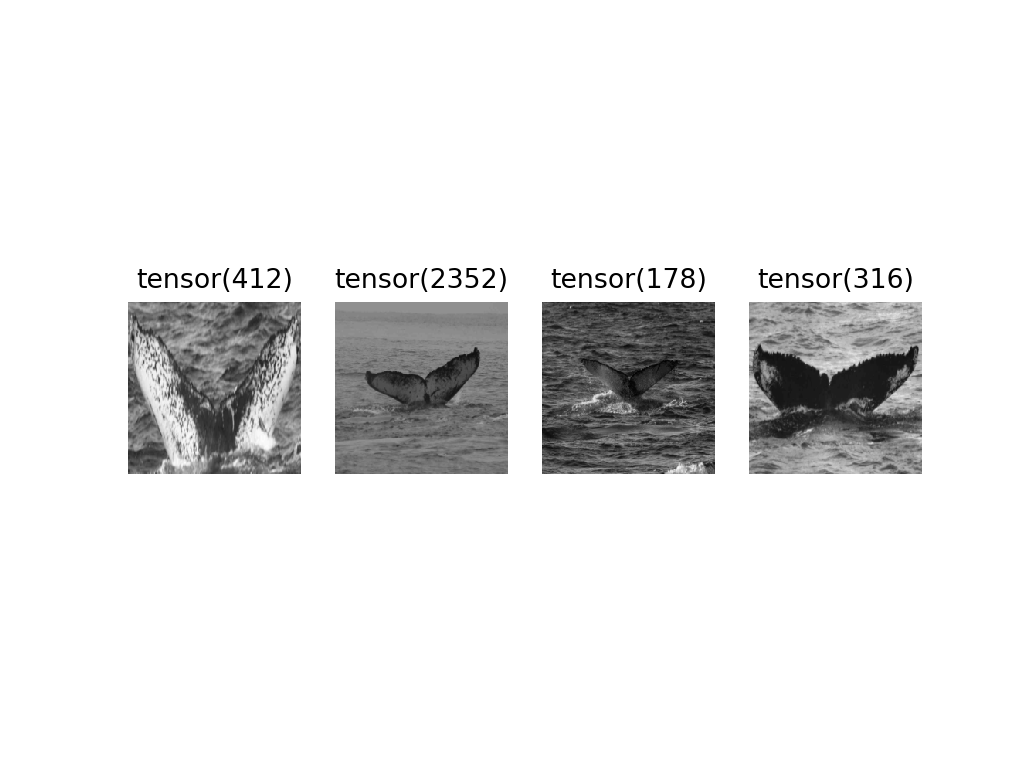

In [137]:
num_loop = 0
fig = plt.figure()
for img, label in train_loader:
    num_loop += 1
    if (num_loop <= 4):
        plt.subplot(1, 4, num_loop)
        myimshow(img[0])
        plt.title(str(label[0]))
    else:
        break
        

In [138]:
class NNClassifier(nt.NeuralNetwork):
    def __init__(self):
        super(NNClassifier, self).__init__()
        self.cross_entropy = nn.CrossEntropyLoss()
    def criterion(self, y, d):
        return self.cross_entropy(y, d)

In [139]:
vgg = tv.models.vgg16_bn(pretrained=True)

In [140]:
vgg.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace)
  (2): Dropout(p=0.5)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace)
  (5): Dropout(p=0.5)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [141]:
class VGG16Transfer(NNClassifier):
    def __init__(self, num_classes, fine_tuning=False):
        super(VGG16Transfer, self).__init__()
        vgg = tv.models.vgg16_bn(pretrained=True)
        for param in vgg.parameters():
            param.requires_grad = fine_tuning
        self.features = vgg.features
        self.classifier = vgg.classifier
        # COMPLETE
        num_ftrs = vgg.classifier[6].in_features
        self.classifier[6] = nn.Linear(num_ftrs, num_classes)
    def forward(self, x):
        # COMPLETE
        f = self.features(x)
        f = f.view(-1, 25088)
        y = self.classifier(f)
        return y

In [142]:
num_classes = train_set.number_of_classes()

In [143]:
vgg16 = VGG16Transfer(num_classes)

In [144]:
vgg16

VGG16Transfer(
  (cross_entropy): CrossEntropyLoss()
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=Fals

In [145]:
class ClassificationStatsManager(nt.StatsManager):

    def __init__(self):
        super(ClassificationStatsManager, self).__init__()
    def init(self):
        super(ClassificationStatsManager, self).init()
        self.running_accuracy = 0
    def accumulate(self, loss, x, y, d):
        super(ClassificationStatsManager, self).accumulate(loss, x, y, d)
        topK_rpob, l = torch.topk(y, 5)
        batchSize = d.size()[0]
        count = 0
        for i in range(batchSize):
            if(d[i] in l[i]):
                count += 1
        #self.running_accuracy += torch.mean((d == l).float()) 
        self.running_accuracy += count / batchSize
        
    def summarize(self):
        loss = super(ClassificationStatsManager, self).summarize()
        accuracy = 100 * self.running_accuracy / self.number_update# COMPLETE
        return {'loss': loss, 'accuracy': accuracy}

In [149]:
lr = 1e-3
net = VGG16Transfer(num_classes)
net = net.to(device)
adam = torch.optim.Adam(net.parameters(), lr=lr)
stats_manager = ClassificationStatsManager()
exp4 = nt.Experiment(net, train_set, val_set, adam, stats_manager,
                output_dir="whaleclass1_new2", perform_validation_during_training=True)

In [150]:
def plot(exp, fig, axes):
    axes[0].clear()
    axes[1].clear()
    axes[0].plot([exp.history[k][0]['loss'] for k in range(exp.epoch)],
                label="training loss")
    axes[0].plot([exp.history[k][1]['loss'] for k in range(exp.epoch)], label="evaluation loss")
    axes[0].legend(('Validation','Training'), fontsize=6, loc=0)
    axes[0].title.set_text('Model Loss')
    
    axes[1].plot([exp.history[k][0]['accuracy'] for k in range(exp.epoch)],
                label="training accuracy")
    axes[1].plot([exp.history[k][1]['accuracy'] for k in range(exp.epoch)], label="evaluation accuracy")
    # COMPLETE
    axes[1].legend(('Validation','Training'), fontsize=6, loc=2)
    axes[1].title.set_text('Model Accuracy')
    
    plt.tight_layout()
    fig.canvas.draw()

<IPython.core.display.Javascript object>


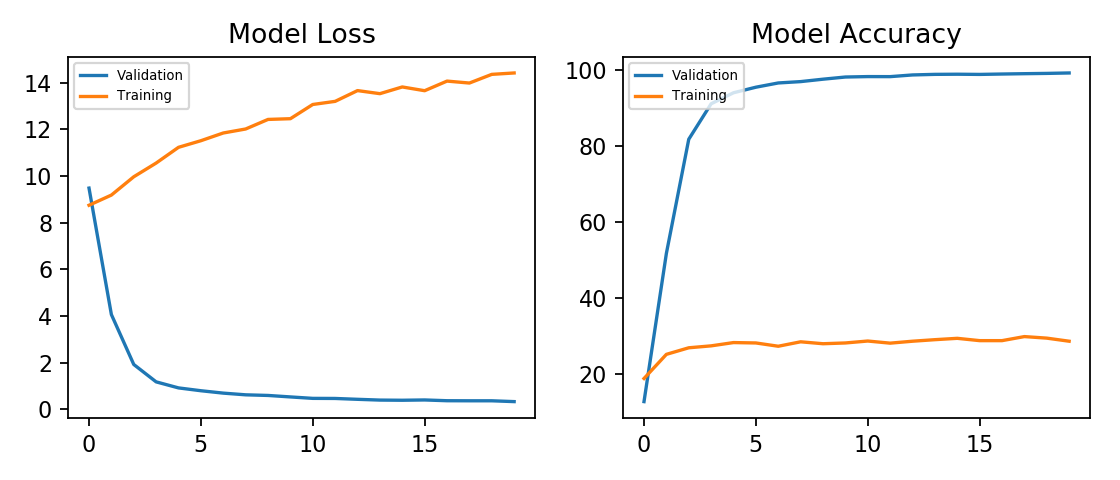

Start/Continue training from epoch 20
Finish training for 20 epochs


In [151]:

fig, axes = plt.subplots(ncols=2, figsize=(7, 3))
exp4.run(num_epochs=20, plot=lambda exp: plot(exp, fig=fig, axes=axes))

In [152]:
print(exp4.evaluate())

{'loss': 14.414612611134848, 'accuracy': 28.556910569105693}
